# Train Local Model

En este código vamos a entrenar cada miembro del equipo el mismo modelo, cada uno con diferentes datos.

### Librerías

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2


### Importar datasets de entrenamiento y prueba

Importamos el dataset de entrenamiento que tocó a cada integrante y el datasets de prueba.

In [17]:
# Cargar datos de entrenamiento y de prueba
data_fold1 = np.load('data_fold1.npz') ####### Modificar
test_data = np.load('test_data.npz')

# Guardar datos de entrenamiento y prueba en sus variables X y Y
x_train = data_fold1['x']
y_train = data_fold1['y']

x_test = test_data['x']
y_test = test_data['y']

# Mostramos el shape de cada subset
print(f"Entrenamiento  ---> \tX: {x_train.shape}\ty: {y_train.shape}")
print(f"Prueba  ---> \t\tX: {x_test.shape}\ty: {y_test.shape}")

Entrenamiento  ---> 	X: (12000, 28, 28, 1)	y: (12000,)
Prueba  ---> 		X: (10000, 28, 28, 1)	y: (10000,)


### Definición del modelo

In [3]:
def cnn_model():
  model = keras.models.Sequential([
      keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Conv2D(64, (3, 3), activation='relu'),
      keras.layers.MaxPooling2D((2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Flatten(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Entrenamiento del modelo

In [4]:
def train_local_model(model, x_train, y_train, x_test, y_test, epochs=3, save_name="model"):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.6095 - loss: 1.1762 - val_accuracy: 0.9524 - val_loss: 0.1788
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9211 - loss: 0.2547 - val_accuracy: 0.9684 - val_loss: 0.1130
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9454 - loss: 0.1813 - val_accuracy: 0.9709 - val_loss: 0.0949
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


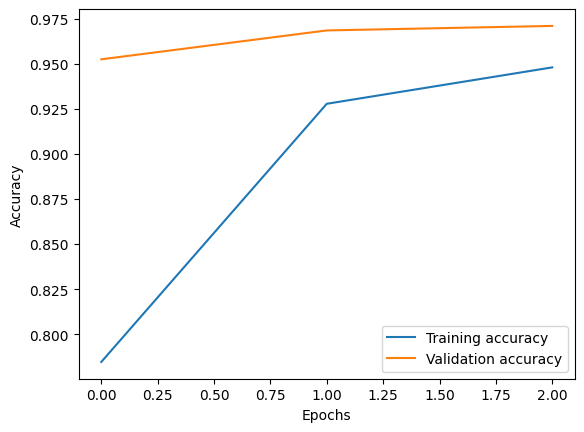

In [18]:
epochs = 3
model = cnn_model()
model = train_local_model(model, x_train, y_train, x_test, y_test, epochs)

model.save(f'model_fold1.keras') ### Modificar